In [67]:
# Import numpy as np, pandas as pd, matplotlib as plt, seaborn as sns, requests and beautifulsoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs

In [68]:
# Read World Population CSV file
World_Pop = pd.read_csv("https://github.com/riggers77/UCDPA_PatRigney/blob/main/World_Pop.csv?raw=True")

In [69]:
# Inspect first five rows of csv file
print(World_Pop.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2012         2013         2014         2015  \
0      58782.0  .

In [70]:
# Read GDP Per Country CSV file
World_GDP = pd.read_csv("https://github.com/riggers77/UCDPA_PatRigney/blob/main/GDP_per_country.csv?raw=True")

In [71]:
# Inspect first five rows of GDP csv file
print(World_GDP.head())

  Country Name Country Code     Indicator Name  Indicator Code         1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD          NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  537777811.1   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD          NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD          NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD          NaN   

          1961         1962         1963         1964          1965  ...  \
0          NaN          NaN          NaN          NaN           NaN  ...   
1  548888895.6  546666677.8  751111191.1  800000044.4  1.006667e+09  ...   
2          NaN          NaN          NaN          NaN           NaN  ...   
3          NaN          NaN          NaN          NaN           NaN  ...   
4          NaN          NaN          NaN          NaN           NaN  ...   

           2011          2012          2013          2014          2

In [72]:
# Use beautifulsoup to scrape the web for html code for table of countries by continent.
url="https://statisticstimes.com/geography/countries-by-continents.php"
r=requests.get(url)
html_doc = r.text
soup = bs(html_doc)
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   <!--
if (screen.width <= 699) {
document.location = "https://m.statisticstimes.com/geography/countries-by-continents.php";
}
//-->
  </script>
  <title>
   List of Countries by Continent - StatisticsTimes.com
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="The list of countries or areas contains the names of countries or areas, their 
three-digit numerical codes used for statistical processing purposes by the Statistics Division of the United 
Nations Secretariat, and their three-digit alphabetical codes assigned by the ISO." name="description"/>
  <link href="https://m.statisticstimes.com/geography/countries-by-continents.php" media="only screen and (max-width: 699px)" rel="alternate"/>
  <link href="https://statisticstimes.com/geography/countries-by-continents.php" rel="canonical"/>
  <link href="../table.css" rel="stylesheet" type="text/css"/>
  <link href="../css_new.css" rel="

In [73]:
# find table in html and store as variable table
table = soup.find('table', id="table_id")

In [74]:
# convert to pandas DataFrame
table_df =  pd.read_html(str(table))[0]
table_df

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania
...,...,...,...,...,...,...,...
244,245,Wallis and Futuna Islands,WLF,876,Polynesia,NaN,Oceania
245,246,Western Sahara,ESH,732,Northern Africa,NaN,Africa
246,247,Yemen,YEM,887,Western Asia,NaN,Asia
247,248,Zambia,ZMB,894,Eastern Africa,Sub-Saharan Africa,Africa


In [75]:
# Set Country as index for Continenants DF
Continents=table_df.set_index('Country or Area')
print(Continents.head())

                 No ISO-alpha3 Code  M49 Code         Region 1 Region 2  \
Country or Area                                                           
Afghanistan       1             AFG         4    Southern Asia      NaN   
Åland Islands     2             ALA       248  Northern Europe      NaN   
Albania           3             ALB         8  Southern Europe      NaN   
Algeria           4             DZA        12  Northern Africa      NaN   
American Samoa    5             ASM        16        Polynesia      NaN   

                Continent  
Country or Area            
Afghanistan          Asia  
Åland Islands      Europe  
Albania            Europe  
Algeria            Africa  
American Samoa    Oceania  


In [76]:
# Use beautifulsoup to scrap the web for html code for table of countries by alpha-2 and alpha-3 codes.
url2="https://www.iban.com/country-codes"
r2=requests.get(url2)
html_doc2=r2.text
soup2=bs(html_doc2)
print(soup2.prettify())

<!DOCTYPE html>
<!--[if IE 8 ]><html class="ie" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en"> <![endif]-->
<!--[if (gte IE 9)|!(IE)]><!-->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <!--[if IE]><meta http-equiv='X-UA-Compatible' content='IE=edge,chrome=1'><![endif]-->
  <title>
   List of country codes by alpha-2, alpha-3 code (ISO 3166)
  </title>
  <meta content="Updated list of country codes. Alpha-2, alpha-3 code character alphabetic and 3 digit Numeric code ISO 3166 codes for each country." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="#153570" name="theme-color"/>
  <meta content="#153570" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="width" name="MobileOptimized"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link cro

In [77]:
# find alphas-2 table in html and store as variable table
table_alpha=soup2.find('table', id="myTable")

In [78]:
# convert this alpha-2 table to pandas DataFrame
table_df_alpha= pd.read_html(str(table_alpha))[0]
table_df_alpha

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876
245,Western Sahara,EH,ESH,732
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894


In [79]:
# Read World Population CSV file
World_HPI= pd.read_csv("https://github.com/riggers77/UCDPA_PatRigney/blob/main/House_Price_Index.csv?raw=True")

In [80]:
# Inspect first five rows of csv file
print(World_HPI.head())

               DATAFLOW       LAST UPDATE freq purchase       unit geo  \
0  ESTAT:PRC_HPI_A(1.0)  10/01/2023 11:00    A    TOTAL  I15_A_AVG  AT   
1  ESTAT:PRC_HPI_A(1.0)  10/01/2023 11:00    A    TOTAL  I15_A_AVG  AT   
2  ESTAT:PRC_HPI_A(1.0)  10/01/2023 11:00    A    TOTAL  I15_A_AVG  AT   
3  ESTAT:PRC_HPI_A(1.0)  10/01/2023 11:00    A    TOTAL  I15_A_AVG  AT   
4  ESTAT:PRC_HPI_A(1.0)  10/01/2023 11:00    A    TOTAL  I15_A_AVG  AT   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2010      76.80      NaN  
1         2011      81.60      NaN  
2         2012      87.57      NaN  
3         2013      92.10      NaN  
4         2014      95.33      NaN  


In [81]:
# Clean DataFrame World_HPI by removing unwanted columns
World_HPI_by_Country_Cleaned=World_HPI.iloc[:, [5,6,7]]
World_HPI_by_Country_Cleaned=World_HPI_by_Country_Cleaned.rename(columns={'geo': 'Alpha-2 code', 'TIME_PERIOD':'Year'})
print(World_HPI_by_Country_Cleaned.head())
World_HPI_by_Country_Cleaned.shape

  Alpha-2 code  Year  OBS_VALUE
0           AT  2010      76.80
1           AT  2011      81.60
2           AT  2012      87.57
3           AT  2013      92.10
4           AT  2014      95.33


(514, 3)

In [82]:
# Merge World_HPI_by_Country_Cleaned DF with table_df_alpha DF on Alpha-2 code using a left merge and rename columns Alpha-3 code and OBS_Value
HPI_Country_Code = World_HPI_by_Country_Cleaned.merge(table_df_alpha, on='Alpha-2 code', how='left')
HPI_Country_Code=HPI_Country_Code.rename(columns={'Alpha-3 code':'Country Code', 'OBS_VALUE':'HPI'})
print(HPI_Country_Code.head())
HPI_Country_Code.shape

  Alpha-2 code  Year    HPI  Country Country Code  Numeric
0           AT  2010  76.80  Austria          AUT     40.0
1           AT  2011  81.60  Austria          AUT     40.0
2           AT  2012  87.57  Austria          AUT     40.0
3           AT  2013  92.10  Austria          AUT     40.0
4           AT  2014  95.33  Austria          AUT     40.0


(514, 6)

In [83]:
# Create List of Years in Scope
Years_in_Scope=[str('Country Name'),str("Country Code"),"2005", "2006",	"2007",	"2008",	"2009",	"2010",	"2011",	"2012",	"2013",	"2014",	"2015",	"2016",	"2017",	"2018",	"2019"]

In [84]:
# Slice DataFrame to only include the years in scope data for World Population
World_Pop_cleaned=World_Pop.loc[:, Years_in_Scope]


In [85]:
# Slice DataFrame to only include the years in scope data for World GDP
World_GDP_cleaned = World_GDP.loc[:, Years_in_Scope]
print(World_GDP_cleaned)

     Country Name Country Code          2005          2006          2007  \
0           Aruba          ABW  2.330726e+09  2.424581e+09  2.615084e+09   
1     Afghanistan          AFG  6.209138e+09  6.971286e+09  9.747880e+09   
2          Angola          AGO  3.697092e+10  5.238101e+10  6.526645e+10   
3         Albania          ALB  8.052076e+09  8.896074e+09  1.067732e+10   
4         Andorra          AND  3.159905e+09  3.456442e+09  3.952601e+09   
..            ...          ...           ...           ...           ...   
259        Kosovo          XKX  3.663102e+09  3.846820e+09  4.655899e+09   
260   Yemen, Rep.          YEM  1.674634e+10  1.906198e+10  2.165053e+10   
261  South Africa          ZAF  2.580000e+11  2.720000e+11  2.990000e+11   
262        Zambia          ZMB  8.331870e+09  1.275686e+10  1.405696e+10   
263      Zimbabwe          ZWE  5.755215e+09  5.443896e+09  5.291950e+09   

             2008          2009          2010          2011          2012  \
0    2.745

In [86]:
# Clean DataFrame Continents to remove unwanted columns
Continent_Cleaned = Continents.iloc[:, [1,3,5]]
print(Continent_Cleaned.head())


                ISO-alpha3 Code         Region 1 Continent
Country or Area                                           
Afghanistan                 AFG    Southern Asia      Asia
Åland Islands               ALA  Northern Europe    Europe
Albania                     ALB  Southern Europe    Europe
Algeria                     DZA  Northern Africa    Africa
American Samoa              ASM        Polynesia   Oceania


In [87]:
# Rename ISO Alpha3 Code Column to Country Code
Continent_Cleaned=Continent_Cleaned.rename(columns={'ISO-alpha3 Code' : 'Country Code'})
print(Continent_Cleaned)

                          Country Code         Region 1 Continent
Country or Area                                                  
Afghanistan                        AFG    Southern Asia      Asia
Åland Islands                      ALA  Northern Europe    Europe
Albania                            ALB  Southern Europe    Europe
Algeria                            DZA  Northern Africa    Africa
American Samoa                     ASM        Polynesia   Oceania
...                                ...              ...       ...
Wallis and Futuna Islands          WLF        Polynesia   Oceania
Western Sahara                     ESH  Northern Africa    Africa
Yemen                              YEM     Western Asia      Asia
Zambia                             ZMB   Eastern Africa    Africa
Zimbabwe                           ZWE   Eastern Africa    Africa

[249 rows x 3 columns]


In [88]:
# Merge Continents Column in Continent_Cleaned DataFrame with World_Pop_Per_country_cleaned DataFrame
Merge_Population = World_Pop_cleaned.merge(Continent_Cleaned, on='Country Code', how='left')
print(Merge_Population)


                    Country Name Country Code         2005         2006  \
0                          Aruba          ABW      94483.0      95606.0   
1    Africa Eastern and Southern          AFE  457153837.0  469508516.0   
2                    Afghanistan          AFG   24411191.0   25442944.0   
3     Africa Western and Central          AFW  309824829.0  318601484.0   
4                         Angola          AGO   19450959.0   20162340.0   
..                           ...          ...          ...          ...   
261                       Kosovo          XKX    1705780.0    1719536.0   
262                  Yemen, Rep.          YEM   21320671.0   21966298.0   
263                 South Africa          ZAF   49017147.0   49491756.0   
264                       Zambia          ZMB   11564870.0   11971567.0   
265                     Zimbabwe          ZWE   12224753.0   12330490.0   

            2007         2008         2009         2010         2011  \
0        96787.0      97996

In [89]:
# Clean the DataFrame Merge_Population so all NaN rows are dropped as they do not relate to countries but regions within the Country field for World_Pop data set
Merge_Pop_Cleaned=Merge_Population.dropna()
print(Merge_Pop_Cleaned)

     Country Name Country Code        2005        2006        2007  \
0           Aruba          ABW     94483.0     95606.0     96787.0   
2     Afghanistan          AFG  24411191.0  25442944.0  25903301.0   
4          Angola          AGO  19450959.0  20162340.0  20909684.0   
5         Albania          ALB   3011487.0   2992547.0   2970017.0   
6         Andorra          AND     79826.0     80221.0     78168.0   
..            ...          ...         ...         ...         ...   
260         Samoa          WSM    188626.0    189379.0    190478.0   
262   Yemen, Rep.          YEM  21320671.0  21966298.0  22641538.0   
263  South Africa          ZAF  49017147.0  49491756.0  49996094.0   
264        Zambia          ZMB  11564870.0  11971567.0  12402073.0   
265      Zimbabwe          ZWE  12224753.0  12330490.0  12450568.0   

           2008        2009        2010        2011        2012        2013  \
0       97996.0     99212.0    100341.0    101288.0    102112.0    102880.0   
2

In [90]:
# Reshape the DF Merge_Population using melt to have all columns relating to years be in one column against Country, Country code, Region and Continent
Pop_Cleaned_Reshaped = Merge_Pop_Cleaned.melt(id_vars=['Country Name', 'Country Code', 'Region 1', 'Continent'])

In [91]:
# Rename the variable and value column that is created from the output of the reshape to a more understandable context ie Year and Population
Pop_Columns_Updated=Pop_Cleaned_Reshaped.rename(columns={'variable':'Year', 'value':'Population'})
print(Pop_Columns_Updated)

      Country Name Country Code         Region 1      Continent  Year  \
0            Aruba          ABW        Caribbean  North America  2005   
1      Afghanistan          AFG    Southern Asia           Asia  2005   
2           Angola          AGO    Middle Africa         Africa  2005   
3          Albania          ALB  Southern Europe         Europe  2005   
4          Andorra          AND  Southern Europe         Europe  2005   
...            ...          ...              ...            ...   ...   
3220         Samoa          WSM        Polynesia        Oceania  2019   
3221   Yemen, Rep.          YEM     Western Asia           Asia  2019   
3222  South Africa          ZAF  Southern Africa         Africa  2019   
3223        Zambia          ZMB   Eastern Africa         Africa  2019   
3224      Zimbabwe          ZWE   Eastern Africa         Africa  2019   

      Population  
0        94483.0  
1     24411191.0  
2     19450959.0  
3      3011487.0  
4        79826.0  
...      

In [92]:
# Reshape the DF World_GDP_cleaned using melt to have all columns relating to years be in one column against Country and country Code
World_GDP_Reshaped = World_GDP_cleaned.melt(id_vars=['Country Name', 'Country Code'])

In [93]:
# Rename the variable and value column that is created from the output of the reshape to a more understandable context ie Year and GDP
World_GDP_Columns_Updated=World_GDP_Reshaped.rename(columns={'variable':'Year', 'value':'GDP'})
print(World_GDP_Columns_Updated)
World_GDP_Columns_Updated.to_csv('/content/drive/MyDrive/Colab Notebooks/World_GDP_Columns_Updated.csv')

      Country Name Country Code  Year           GDP
0            Aruba          ABW  2005  2.330726e+09
1      Afghanistan          AFG  2005  6.209138e+09
2           Angola          AGO  2005  3.697092e+10
3          Albania          ALB  2005  8.052076e+09
4          Andorra          AND  2005  3.159905e+09
...            ...          ...   ...           ...
3955        Kosovo          XKX  2019  7.926134e+09
3956   Yemen, Rep.          YEM  2019  2.258108e+10
3957  South Africa          ZAF  2019  3.510000e+11
3958        Zambia          ZMB  2019  2.330977e+10
3959      Zimbabwe          ZWE  2019  2.144076e+10

[3960 rows x 4 columns]


In [94]:
# Merge the DF Pop_Columns_Update and World_GDP_Columns_Updated on a left join on Country Code so all records for Pop_Columns_Update are returned along with related columns from World_GDP_Columns_Updated
Merge_Pop_GDP = Pop_Columns_Updated.merge(World_GDP_Columns_Updated, on=['Country Code', 'Year'], how='left', suffixes=('_pop', '_gdp'))
print(Merge_Pop_GDP)
Merge_Pop_GDP.isna().any()

     Country Name_pop Country Code         Region 1      Continent  Year  \
0               Aruba          ABW        Caribbean  North America  2005   
1         Afghanistan          AFG    Southern Asia           Asia  2005   
2              Angola          AGO    Middle Africa         Africa  2005   
3             Albania          ALB  Southern Europe         Europe  2005   
4             Andorra          AND  Southern Europe         Europe  2005   
...               ...          ...              ...            ...   ...   
3220            Samoa          WSM        Polynesia        Oceania  2019   
3221      Yemen, Rep.          YEM     Western Asia           Asia  2019   
3222     South Africa          ZAF  Southern Africa         Africa  2019   
3223           Zambia          ZMB   Eastern Africa         Africa  2019   
3224         Zimbabwe          ZWE   Eastern Africa         Africa  2019   

      Population Country Name_gdp           GDP  
0        94483.0            Aruba  2.

Country Name_pop    False
Country Code        False
Region 1            False
Continent           False
Year                False
Population          False
Country Name_gdp    False
GDP                  True
dtype: bool

In [95]:
# Fill any missing data with the previous years missing data for GDP as it is the only column with missing data
Merge_Pop_GDP.sort_values(['Country Name_pop', 'Year'])
Pop_GDP_Fill_Missing_Values= Merge_Pop_GDP.fillna(method='ffill')
print(Pop_GDP_Fill_Missing_Values)
Pop_GDP_Fill_Missing_Values.shape
Pop_GDP_Fill_Missing_Values.to_csv('/content/drive/MyDrive/Colab Notebooks/Pop_GDP_Fill_Missing_Values.csv')

     Country Name_pop Country Code         Region 1      Continent  Year  \
0               Aruba          ABW        Caribbean  North America  2005   
1         Afghanistan          AFG    Southern Asia           Asia  2005   
2              Angola          AGO    Middle Africa         Africa  2005   
3             Albania          ALB  Southern Europe         Europe  2005   
4             Andorra          AND  Southern Europe         Europe  2005   
...               ...          ...              ...            ...   ...   
3220            Samoa          WSM        Polynesia        Oceania  2019   
3221      Yemen, Rep.          YEM     Western Asia           Asia  2019   
3222     South Africa          ZAF  Southern Africa         Africa  2019   
3223           Zambia          ZMB   Eastern Africa         Africa  2019   
3224         Zimbabwe          ZWE   Eastern Africa         Africa  2019   

      Population Country Name_gdp           GDP  
0        94483.0            Aruba  2.

In [96]:
# Clean the DF HPI_Country_Code by removing null values as they do not represent countries
HPI_Country_Code_Cleaned=HPI_Country_Code.dropna()
print(HPI_Country_Code_Cleaned)
HPI_Country_Code_Cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/HPI_Country_Code_Cleaned.csv')

    Alpha-2 code  Year     HPI  Country Country Code  Numeric
0             AT  2010   76.80  Austria          AUT     40.0
1             AT  2011   81.60  Austria          AUT     40.0
2             AT  2012   87.57  Austria          AUT     40.0
3             AT  2013   92.10  Austria          AUT     40.0
4             AT  2014   95.33  Austria          AUT     40.0
..           ...   ...     ...      ...          ...      ...
494           TR  2017  124.83   Turkey          TUR    792.0
495           TR  2018  133.40   Turkey          TUR    792.0
496           TR  2019  140.64   Turkey          TUR    792.0
497           TR  2020  175.50   Turkey          TUR    792.0
498           TR  2021  245.40   Turkey          TUR    792.0

[450 rows x 6 columns]


In [97]:
# Convert Year column in Pop_GDP_Missing_Values to integer type as after being used as a merge column for two DF it became an object and would provide an error on next step of merging
Pop_GDP_Fill_Missing_Values['Year']=Pop_GDP_Fill_Missing_Values['Year'].astype(int)

In [98]:
# Merge DFs Pop_GDP_Fill_Missing_Values and HPI_Country_Code
Pop_GDP_HPI_Years=Pop_GDP_Fill_Missing_Values.merge(HPI_Country_Code_Cleaned, on=['Country Code', 'Year'], how='left')
Pop_GDP_HPI_Years.shape
print(Pop_GDP_HPI_Years)
Pop_GDP_HPI_Years.to_csv('/content/drive/MyDrive/Colab Notebooks/Pop_GDP_HPI_Years.csv')

     Country Name_pop Country Code         Region 1      Continent  Year  \
0               Aruba          ABW        Caribbean  North America  2005   
1         Afghanistan          AFG    Southern Asia           Asia  2005   
2              Angola          AGO    Middle Africa         Africa  2005   
3             Albania          ALB  Southern Europe         Europe  2005   
4             Andorra          AND  Southern Europe         Europe  2005   
...               ...          ...              ...            ...   ...   
3220            Samoa          WSM        Polynesia        Oceania  2019   
3221      Yemen, Rep.          YEM     Western Asia           Asia  2019   
3222     South Africa          ZAF  Southern Africa         Africa  2019   
3223           Zambia          ZMB   Eastern Africa         Africa  2019   
3224         Zimbabwe          ZWE   Eastern Africa         Africa  2019   

      Population Country Name_gdp           GDP Alpha-2 code  HPI Country  \
0        9

In [99]:
# Find what values are missing and what part of the dataset has a working dataset using the continent as the group argument
Pop_GDP_HPI_Years.groupby(by=['Continent'], dropna=True).count()

,Country Name_pop,Country Code,Region 1,Year,Population,Country Name_gdp,GDP,Alpha-2 code,HPI,Country,Numeric
Continent,,,,,,,,,,,
Africa,810,810,810,810,810,810,810,0,0,0,0
Asia,750,750,750,750,750,750,750,25,25,25,25
Europe,690,690,690,690,690,690,690,367,367,367,367
North America,510,510,510,510,510,510,510,0,0,0,0
Oceania,285,285,285,285,285,285,285,0,0,0,0
South America,180,180,180,180,180,180,180,0,0,0,0


In [100]:
# As Europe has the closest complete set of data I will use Europe as my dataset. I will use numpy and comparators to filter my data frame to just show Europe countries
Eur_DF = Pop_GDP_HPI_Years[np.logical_and(Pop_GDP_HPI_Years['Continent']=='Europe', Pop_GDP_HPI_Years['Year']>2009)]
print(Eur_DF)

     Country Name_pop Country Code         Region 1 Continent  Year  \
1078          Albania          ALB  Southern Europe    Europe  2010   
1079          Andorra          AND  Southern Europe    Europe  2010   
1086          Austria          AUT   Western Europe    Europe  2010   
1089          Belgium          BEL   Western Europe    Europe  2010   
1093         Bulgaria          BGR   Eastern Europe    Europe  2010   
...               ...          ...              ...       ...   ...   
3185           Serbia          SRB  Southern Europe    Europe  2019   
3189  Slovak Republic          SVK   Eastern Europe    Europe  2019   
3190         Slovenia          SVN  Southern Europe    Europe  2019   
3191           Sweden          SWE  Northern Europe    Europe  2019   
3210          Ukraine          UKR   Eastern Europe    Europe  2019   

      Population Country Name_gdp           GDP Alpha-2 code     HPI  \
1078   2913021.0          Albania  1.192693e+10          NaN     NaN   
107

In [101]:
# Find what values are missing and what part of the dataset has a working dataset using the continent as the group argument
Eur_DF.groupby(by=['Country Name_pop'], dropna=True).count()

,Country Code,Region 1,Continent,Year,Population,Country Name_gdp,GDP,Alpha-2 code,HPI,Country,Numeric
Country Name_pop,,,,,,,,,,,
Albania,10,10,10,10,10,10,10,0,0,0,0
Andorra,10,10,10,10,10,10,10,0,0,0,0
Austria,10,10,10,10,10,10,10,10,10,10,10
Belarus,10,10,10,10,10,10,10,0,0,0,0
Belgium,10,10,10,10,10,10,10,10,10,10,10
Bosnia and Herzegovina,10,10,10,10,10,10,10,0,0,0,0
Bulgaria,10,10,10,10,10,10,10,10,10,10,10
Croatia,10,10,10,10,10,10,10,10,10,10,10
Czechia,10,10,10,10,10,10,10,10,10,10,10


In [102]:
# All missing values relate to countries that have no HPI values for the complete time period so I am going to drop these values from the Data set
Eur_DF_Cleaned = Eur_DF.dropna()
print(Eur_DF_Cleaned)
Eur_DF_Cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Eur_DF_Cleaned.csv')

     Country Name_pop Country Code         Region 1 Continent  Year  \
1086          Austria          AUT   Western Europe    Europe  2010   
1089          Belgium          BEL   Western Europe    Europe  2010   
1093         Bulgaria          BGR   Eastern Europe    Europe  2010   
1123          Czechia          CZE   Eastern Europe    Europe  2010   
1124          Germany          DEU   Western Europe    Europe  2010   
...               ...          ...              ...       ...   ...   
3168         Portugal          PRT  Southern Europe    Europe  2019   
3173          Romania          ROU   Eastern Europe    Europe  2019   
3189  Slovak Republic          SVK   Eastern Europe    Europe  2019   
3190         Slovenia          SVN  Southern Europe    Europe  2019   
3191           Sweden          SWE  Northern Europe    Europe  2019   

      Population Country Name_gdp           GDP Alpha-2 code     HPI  \
1086   8363404.0          Austria  3.920000e+11           AT   76.80   
108

In [103]:
# See how many countries are in scope
Eur_DF_Cleaned['Country Name_pop'].nunique()

27

In [104]:
# Create a new column to show GDP per captia ie GDP divide by population
Eur_DF_Cleaned['GDP Per Capita'] = Eur_DF_Cleaned['GDP Per Capita']= Eur_DF_Cleaned['GDP'] / Eur_DF_Cleaned['Population']

<ipython-input-104-df9e32687a5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eur_DF_Cleaned['GDP Per Capita'] = Eur_DF_Cleaned['GDP Per Capita']= Eur_DF_Cleaned['GDP'] / Eur_DF_Cleaned['Population']


In [105]:
# Base line the Countries Prosperiy by taking the latest years GDP per captia figure
Current_Countries_GDP = Eur_DF_Cleaned.loc[Eur_DF_Cleaned['Year']==2019]

In [106]:
# Show the Top 9 Prosperous Countries
Current_Countries_GDP.nlargest(9,['GDP Per Capita'])


,Country Name_pop,Country Code,Region 1,Continent,Year,Population,Country Name_gdp,GDP,Alpha-2 code,HPI,Country,Numeric,GDP Per Capita
3125,Luxembourg,LUX,Western Europe,Europe,2019,620001.0,Luxembourg,7.110492e+10,LU,131.99,Luxembourg,442.0,114685.168424
3099,Ireland,IRL,Northern Europe,Europe,2019,4934340.0,Ireland,3.890000e+11,IE,134.41,Ireland,372.0,78835.264696
3154,Norway,NOR,Northern Europe,Europe,2019,5347896.0,Norway,4.030000e+11,NO,120.18,Norway,578.0,75356.738426
3102,Iceland,ISL,Northern Europe,Europe,2019,360563.0,Iceland,2.418804e+10,IS,148.30,Iceland,352.0,67084.083708
3062,Denmark,DNK,Northern Europe,Europe,2019,5814422.0,Denmark,3.500000e+11,DK,117.51,Denmark,208.0,60195.149234
3153,Netherlands,NLD,Western Europe,Europe,2019,17344874.0,Netherlands,9.070000e+11,NL,132.62,Netherlands (the),528.0,52292.106590
3191,Sweden,SWE,Northern Europe,Europe,2019,10278887.0,Sweden,5.310000e+11,SE,117.19,Sweden,752.0,51659.289571
3021,Austria,AUT,Western Europe,Europe,2019,8879920.0,Austria,4.450000e+11,AT,126.60,Austria,40.0,50113.064082
3071,Finland,FIN,Northern Europe,Europe,2019,5521606.0,Finland,2.690000e+11,FI,103.77,Finland,246.0,48717.710029


In [107]:
# Find the min value for GDP Per Captial for the Top 9 Prosperous Countries (9 is used as we have 27 countries I want to divide them into 3 categories)
Value_for_largest= Current_Countries_GDP.nlargest(9,['GDP Per Capita'])
print(Value_for_largest['GDP Per Capita'].min())

48717.71002856777


In [108]:
# Get a series of countries that are the top 9 prosperous countries
Largest_GDP=Current_Countries_GDP.nlargest(9,['GDP Per Capita'])
Largest_GDP_Countries=Largest_GDP['Country Name_pop']
type(Largest_GDP_Countries)

pandas.core.series.Series

In [109]:
# Get the next 9 countries that are prosperous to see the 18th value for GDP per Captia
Current_Countries_GDP.nlargest(18,['GDP Per Capita'])

,Country Name_pop,Country Code,Region 1,Continent,Year,Population,Country Name_gdp,GDP,Alpha-2 code,HPI,Country,Numeric,GDP Per Capita
3125,Luxembourg,LUX,Western Europe,Europe,2019,620001.0,Luxembourg,7.110492e+10,LU,131.99,Luxembourg,442.0,114685.168424
3099,Ireland,IRL,Northern Europe,Europe,2019,4934340.0,Ireland,3.890000e+11,IE,134.41,Ireland,372.0,78835.264696
3154,Norway,NOR,Northern Europe,Europe,2019,5347896.0,Norway,4.030000e+11,NO,120.18,Norway,578.0,75356.738426
3102,Iceland,ISL,Northern Europe,Europe,2019,360563.0,Iceland,2.418804e+10,IS,148.30,Iceland,352.0,67084.083708
3062,Denmark,DNK,Northern Europe,Europe,2019,5814422.0,Denmark,3.500000e+11,DK,117.51,Denmark,208.0,60195.149234
3153,Netherlands,NLD,Western Europe,Europe,2019,17344874.0,Netherlands,9.070000e+11,NL,132.62,Netherlands (the),528.0,52292.106590
3191,Sweden,SWE,Northern Europe,Europe,2019,10278887.0,Sweden,5.310000e+11,SE,117.19,Sweden,752.0,51659.289571
3021,Austria,AUT,Western Europe,Europe,2019,8879920.0,Austria,4.450000e+11,AT,126.60,Austria,40.0,50113.064082
3071,Finland,FIN,Northern Europe,Europe,2019,5521606.0,Finland,2.690000e+11,FI,103.77,Finland,246.0,48717.710029
3059,Germany,DEU,Western Europe,Europe,2019,83092962.0,Germany,3.860000e+12,DE,128.70,Germany,276.0,46453.994503


In [110]:
# Find the value of the 18th prosperous country for 2019
Value_for_medium=Current_Countries_GDP.nlargest(18,['GDP Per Capita'])
print(Value_for_medium['GDP Per Capita'].min())

23519.7767588998


In [111]:
# Get a series of countries that are the next 9 in the second tier of prosperous countries. This will be countries between the two values we received in the previous code
Medium_GDP=Current_Countries_GDP[np.logical_and(Current_Countries_GDP['GDP Per Capita']<48717.71002856777, Current_Countries_GDP['GDP Per Capita']>=23519.7767588998)]
Medium_GDP_Countries=Medium_GDP['Country Name_pop']
print(Medium_GDP_Countries.tolist())

['Belgium', 'Czechia', 'Germany', 'Spain', 'Estonia', 'France', 'Italy', 'Malta', 'Slovenia']


In [112]:
# Create a for loop that will create a new column called category and iterate through the data frame and populate the new column with one of 3 categories depending if the country is in largest or medium series created above or not.
Category = []
for C in Eur_DF_Cleaned['Country Name_pop']:
  if C in Largest_GDP_Countries.tolist():
    Category.append('Largest GDP Countries')
  elif C in Medium_GDP_Countries.tolist():
    Category.append('Medium GDP Countries')
  else:
    Category.append('Smallest GDP Countries')
Eur_DF_Cleaned['Category']=Category
print(Eur_DF_Cleaned)
Eur_DF_Cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Eur_DF_Cleaned.csv')

     Country Name_pop Country Code         Region 1 Continent  Year  \
1086          Austria          AUT   Western Europe    Europe  2010   
1089          Belgium          BEL   Western Europe    Europe  2010   
1093         Bulgaria          BGR   Eastern Europe    Europe  2010   
1123          Czechia          CZE   Eastern Europe    Europe  2010   
1124          Germany          DEU   Western Europe    Europe  2010   
...               ...          ...              ...       ...   ...   
3168         Portugal          PRT  Southern Europe    Europe  2019   
3173          Romania          ROU   Eastern Europe    Europe  2019   
3189  Slovak Republic          SVK   Eastern Europe    Europe  2019   
3190         Slovenia          SVN  Southern Europe    Europe  2019   
3191           Sweden          SWE  Northern Europe    Europe  2019   

      Population Country Name_gdp           GDP Alpha-2 code     HPI  \
1086   8363404.0          Austria  3.920000e+11           AT   76.80   
108

<ipython-input-112-17d30fac0d35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eur_DF_Cleaned['Category']=Category


In [113]:
# Index the final Data Frame with Country Name as the index
Eur_final_data = Eur_DF_Cleaned.set_index(['Country Name_pop'])
print(Eur_final_data)
Eur_final_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Eur_final_data.csv')

                 Country Code         Region 1 Continent  Year  Population  \
Country Name_pop                                                             
Austria                   AUT   Western Europe    Europe  2010   8363404.0   
Belgium                   BEL   Western Europe    Europe  2010  10895586.0   
Bulgaria                  BGR   Eastern Europe    Europe  2010   7395599.0   
Czechia                   CZE   Eastern Europe    Europe  2010  10474410.0   
Germany                   DEU   Western Europe    Europe  2010  81776930.0   
...                       ...              ...       ...   ...         ...   
Portugal                  PRT  Southern Europe    Europe  2019  10286263.0   
Romania                   ROU   Eastern Europe    Europe  2019  19371648.0   
Slovak Republic           SVK   Eastern Europe    Europe  2019   5454147.0   
Slovenia                  SVN  Southern Europe    Europe  2019   2088385.0   
Sweden                    SWE  Northern Europe    Europe  2019  

In [114]:
# Created a column to show the % increase in Population from oringinal figure in 2010 against the last figure in 2019
Pop_column_2010= pd.DataFrame(Eur_final_data)
Pop_column_2010=Pop_column_2010.loc[Pop_column_2010['Year']==2010]
Pop_column_2019= pd.DataFrame(Eur_final_data)
Pop_column_2019=Pop_column_2019.loc[Pop_column_2019['Year']==2019]
Eur_final_data['Pop in 2010']=Pop_column_2010['Population']
Eur_final_data['Pop in 2019']=Pop_column_2019['Population']
Eur_final_data['Pop Increase']= ((Eur_final_data['Pop in 2019'] - Eur_final_data['Pop in 2010']) / Eur_final_data['Pop in 2010'])*100
print(Eur_final_data)

                 Country Code         Region 1 Continent  Year  Population  \
Country Name_pop                                                             
Austria                   AUT   Western Europe    Europe  2010   8363404.0   
Belgium                   BEL   Western Europe    Europe  2010  10895586.0   
Bulgaria                  BGR   Eastern Europe    Europe  2010   7395599.0   
Czechia                   CZE   Eastern Europe    Europe  2010  10474410.0   
Germany                   DEU   Western Europe    Europe  2010  81776930.0   
...                       ...              ...       ...   ...         ...   
Portugal                  PRT  Southern Europe    Europe  2019  10286263.0   
Romania                   ROU   Eastern Europe    Europe  2019  19371648.0   
Slovak Republic           SVK   Eastern Europe    Europe  2019   5454147.0   
Slovenia                  SVN  Southern Europe    Europe  2019   2088385.0   
Sweden                    SWE  Northern Europe    Europe  2019  

In [115]:
# Created a column to show the % increase in GDP Per Capita from oringinal figure in 2010 against the last figure in 2019
GDP_Capita_column_2010= pd.DataFrame(Eur_final_data)
GDP_Capita_column_2010=GDP_Capita_column_2010.loc[GDP_Capita_column_2010['Year']==2010]
GDP_Capita_column_2019= pd.DataFrame(Eur_final_data)
GDP_Capita_column_2019=GDP_Capita_column_2019.loc[GDP_Capita_column_2019['Year']==2019]
Eur_final_data['GDP Per Cap in 2010']=GDP_Capita_column_2010['GDP Per Capita']
Eur_final_data['GDP Per Cap in 2019']=GDP_Capita_column_2019['GDP Per Capita']
Eur_final_data['GDP Per Capita Increase']= ((Eur_final_data['GDP Per Cap in 2019'] - Eur_final_data['GDP Per Cap in 2010']) / Eur_final_data['GDP Per Cap in 2010'])*100
print(Eur_final_data)

                 Country Code         Region 1 Continent  Year  Population  \
Country Name_pop                                                             
Austria                   AUT   Western Europe    Europe  2010   8363404.0   
Belgium                   BEL   Western Europe    Europe  2010  10895586.0   
Bulgaria                  BGR   Eastern Europe    Europe  2010   7395599.0   
Czechia                   CZE   Eastern Europe    Europe  2010  10474410.0   
Germany                   DEU   Western Europe    Europe  2010  81776930.0   
...                       ...              ...       ...   ...         ...   
Portugal                  PRT  Southern Europe    Europe  2019  10286263.0   
Romania                   ROU   Eastern Europe    Europe  2019  19371648.0   
Slovak Republic           SVK   Eastern Europe    Europe  2019   5454147.0   
Slovenia                  SVN  Southern Europe    Europe  2019   2088385.0   
Sweden                    SWE  Northern Europe    Europe  2019  

In [116]:
# Created a column to show the % increase in HPI from oringinal figure in 2010 against the last figure in 2019
HPI_column_2010= pd.DataFrame(Eur_final_data)
HPI_column_2010=HPI_column_2010.loc[HPI_column_2010['Year']==2010]
HPI_column_2019= pd.DataFrame(Eur_final_data)
HPI_column_2019=HPI_column_2019.loc[HPI_column_2019['Year']==2019]
Eur_final_data['HPI in 2010']=HPI_column_2010['HPI']
Eur_final_data['HPI in 2019']=HPI_column_2019['HPI']
Eur_final_data['HPI Increase']= ((Eur_final_data['HPI in 2019'] - Eur_final_data['HPI in 2010']) / Eur_final_data['HPI in 2010']) *100
print(Eur_final_data)

                 Country Code         Region 1 Continent  Year  Population  \
Country Name_pop                                                             
Austria                   AUT   Western Europe    Europe  2010   8363404.0   
Belgium                   BEL   Western Europe    Europe  2010  10895586.0   
Bulgaria                  BGR   Eastern Europe    Europe  2010   7395599.0   
Czechia                   CZE   Eastern Europe    Europe  2010  10474410.0   
Germany                   DEU   Western Europe    Europe  2010  81776930.0   
...                       ...              ...       ...   ...         ...   
Portugal                  PRT  Southern Europe    Europe  2019  10286263.0   
Romania                   ROU   Eastern Europe    Europe  2019  19371648.0   
Slovak Republic           SVK   Eastern Europe    Europe  2019   5454147.0   
Slovenia                  SVN  Southern Europe    Europe  2019   2088385.0   
Sweden                    SWE  Northern Europe    Europe  2019  

In [117]:
# Created a column to show the % increase in GDP from oringinal figure in 2010 against the last figure in 2019
GDP_column_2010= pd.DataFrame(Eur_final_data)
GDP_column_2010=GDP_column_2010.loc[GDP_column_2010['Year']==2010]
GDP_column_2019= pd.DataFrame(Eur_final_data)
GDP_column_2019=GDP_column_2019.loc[GDP_column_2019['Year']==2019]
Eur_final_data['GDP in 2010']=GDP_column_2010['GDP']
Eur_final_data['GDP in 2019']=GDP_column_2019['GDP']
Eur_final_data['GDP Increase']= ((Eur_final_data['GDP in 2019'] - Eur_final_data['GDP in 2010']) / Eur_final_data['GDP in 2010']) * 100
print(Eur_final_data)
Eur_final_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Eur_final_data.csv')

                 Country Code         Region 1 Continent  Year  Population  \
Country Name_pop                                                             
Austria                   AUT   Western Europe    Europe  2010   8363404.0   
Belgium                   BEL   Western Europe    Europe  2010  10895586.0   
Bulgaria                  BGR   Eastern Europe    Europe  2010   7395599.0   
Czechia                   CZE   Eastern Europe    Europe  2010  10474410.0   
Germany                   DEU   Western Europe    Europe  2010  81776930.0   
...                       ...              ...       ...   ...         ...   
Portugal                  PRT  Southern Europe    Europe  2019  10286263.0   
Romania                   ROU   Eastern Europe    Europe  2019  19371648.0   
Slovak Republic           SVK   Eastern Europe    Europe  2019   5454147.0   
Slovenia                  SVN  Southern Europe    Europe  2019   2088385.0   
Sweden                    SWE  Northern Europe    Europe  2019  

In [118]:
# Create a DataFrame to show the average growth in GDP Per Capita, HPI and Population over 10 year period - 2010 to 2019 for European Countries
Average_Growth_GDP=Eur_final_data.groupby(['Country Name_pop', 'Category'])[['GDP Per Capita', 'HPI', 'Population']].mean()
Average_Growth_GDP=Average_Growth_GDP.reset_index()
Average_Growth_GDP=Average_Growth_GDP.sort_values('GDP Per Capita', ascending=False)
print(Average_Growth_GDP)

   Country Name_pop                Category  GDP Per Capita      HPI  \
16       Luxembourg   Largest GDP Countries   110454.607672  100.540   
19           Norway   Largest GDP Countries    86717.837647   98.752   
12          Ireland   Largest GDP Countries    60924.186939  102.891   
5           Denmark   Largest GDP Countries    58945.125076   99.761   
11          Iceland   Largest GDP Countries    56561.095028  103.683   
26           Sweden   Largest GDP Countries    55631.742019   95.107   
18      Netherlands   Largest GDP Countries    50543.773139  108.891   
0           Austria   Largest GDP Countries    48768.074854  100.243   
7           Finland   Largest GDP Countries    47672.508889  100.110   
1           Belgium    Medium GDP Countries    45189.307737  101.474   
9           Germany    Medium GDP Countries    44823.218701  102.060   
8            France    Medium GDP Countries    40517.525253  103.780   
13            Italy    Medium GDP Countries    34242.023516  106

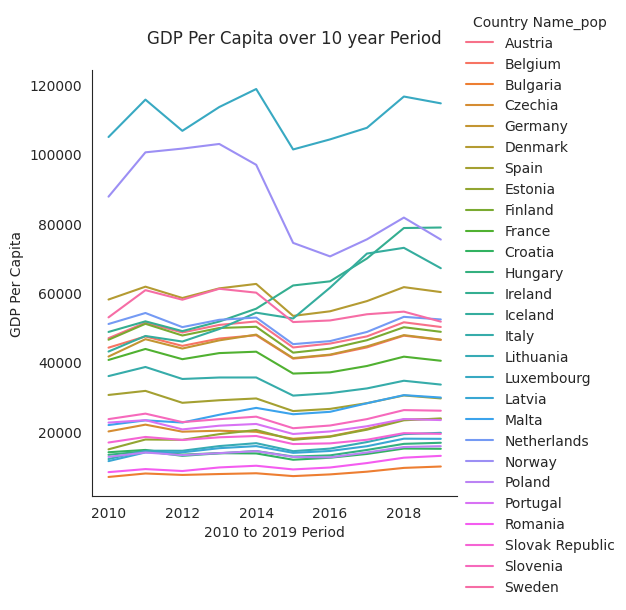

In [119]:
# Using Seaborns relplot to line plot GDP Per Captia over time
g = sns.relplot(x='Year', y='GDP Per Capita', data=Eur_final_data, kind='line', hue='Country Name_pop')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/countries_gdp_per_cap_growth.png')
g.fig.suptitle('GDP Per Capita over 10 year Period', y=1.05)
g.set(xlabel='2010 to 2019 Period', ylabel='GDP Per Capita')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/GDP_Per_Cap_growth.png')
plt.show()

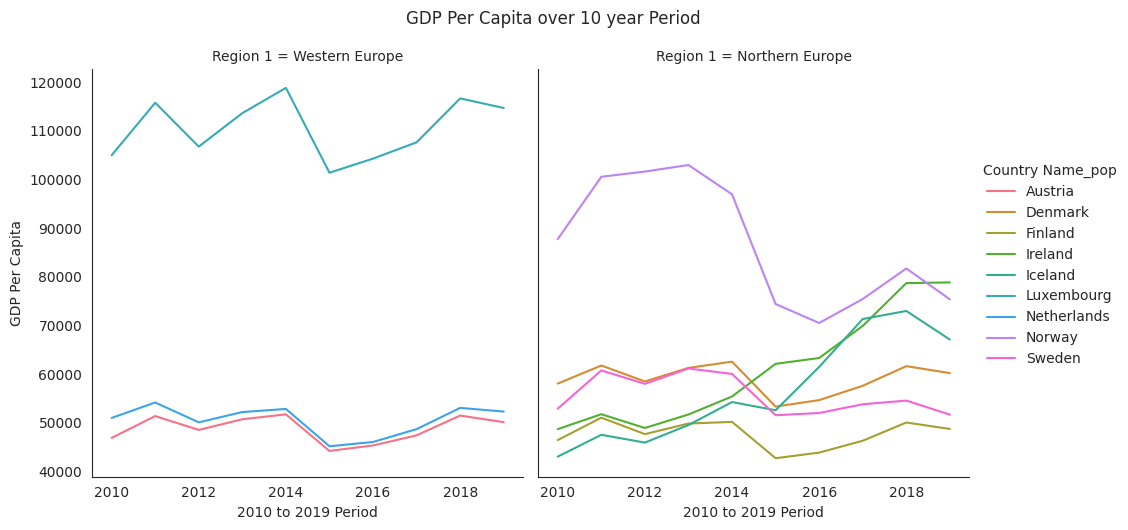

In [120]:
# Drill down into the data by subplotting on Region by category
Largest_GDP=pd.DataFrame(Eur_final_data)
Largest_GDP_with_timeseries=Largest_GDP.loc[Largest_GDP['Category']=='Largest GDP Countries']
sns.set_style('white')
g = sns.relplot(x='Year', y='GDP Per Capita', data=Largest_GDP_with_timeseries, kind='line', hue='Country Name_pop', col='Region 1')
g.fig.suptitle('GDP Per Capita over 10 year Period', y=1.05)
g.set(xlabel='2010 to 2019 Period', ylabel='GDP Per Capita')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Largest_count_gdp_per_cap_growth_by_region.png')
plt.show()

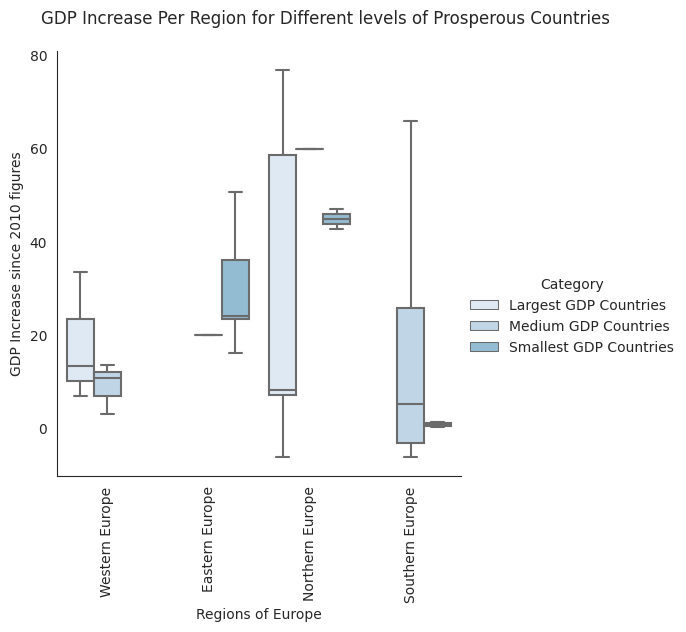

In [121]:
# Use Seaborn to get box plot to see the spread and how skewed is the data
Box_Df=pd.DataFrame(Eur_final_data)
Box_Df=Box_Df.loc[Box_Df['Year']==2019]
sns.set_palette('Blues')
sns.set_style('white')
g=sns.catplot(x='Region 1', y='GDP Increase', data=Box_Df, kind='box', hue='Category')
g.fig.suptitle('GDP Increase Per Region for Different levels of Prosperous Countries', y=1.05)
g.set(xlabel='Regions of Europe', ylabel='GDP Increase since 2010 figures')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Region_gdp_per_cap_%Increase_by_category.png')
plt.show()

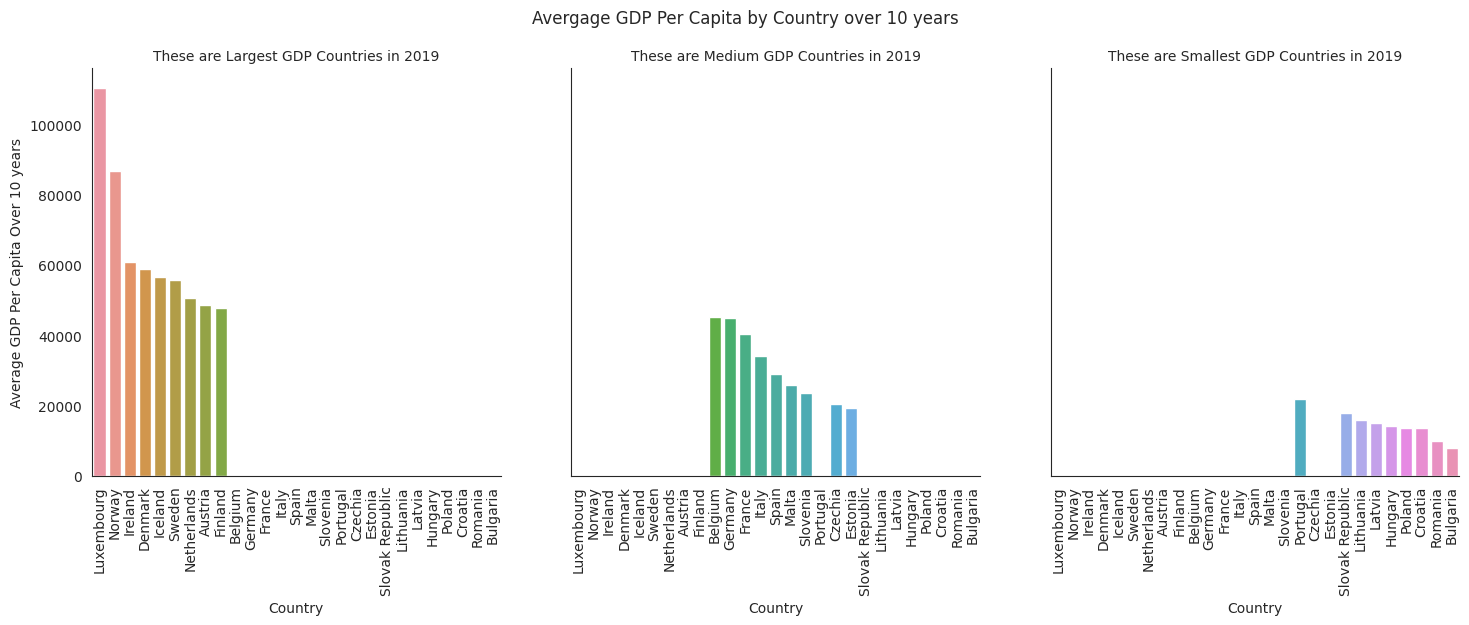

In [122]:
# Seaborns bar plot used to subplot Average GDP Per Capita by category of country
sns.set_style('white')
g = sns.catplot(x='Country Name_pop', y='GDP Per Capita', data=Average_Growth_GDP, kind='bar', col='Category')
g.fig.suptitle('Avergage GDP Per Capita by Country over 10 years', y=1.05)
g.set_titles('These are {col_name} in 2019')
g.set(xlabel="Country", ylabel="Average GDP Per Capita Over 10 years")
g.set_xticklabels(rotation=90)
plt.show()

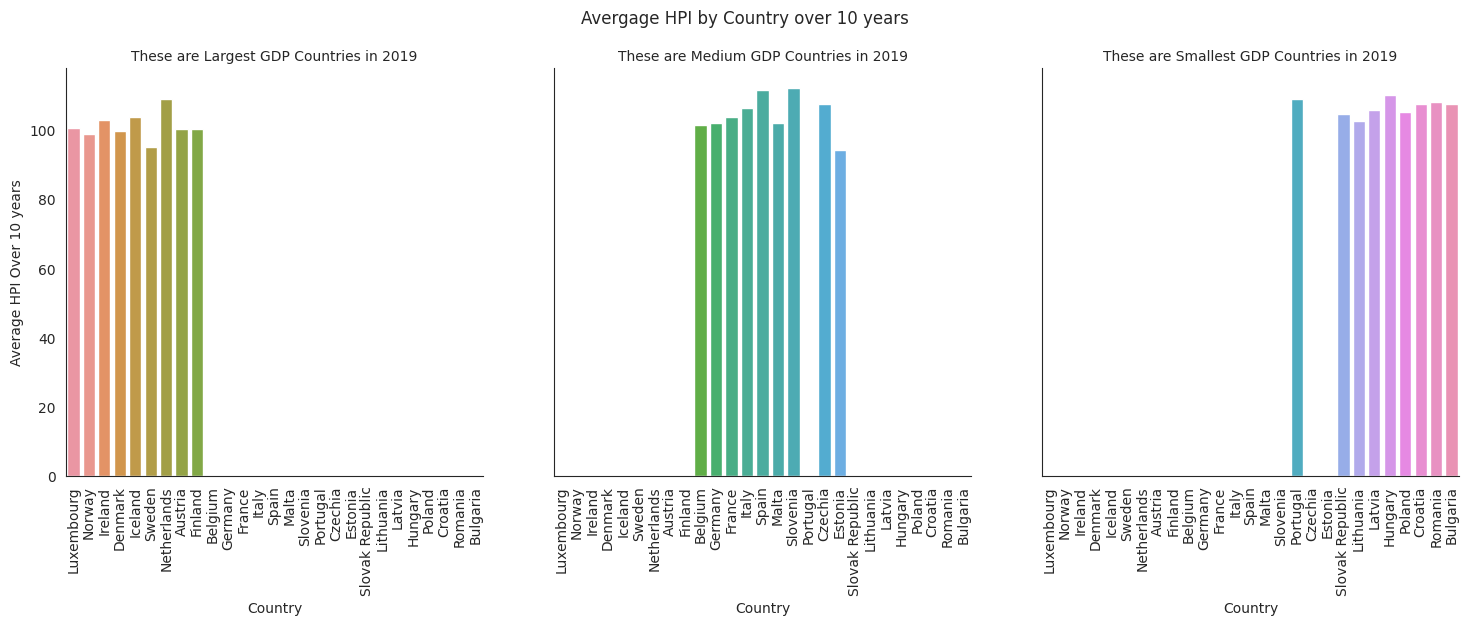

In [123]:
# Seaborns bar plot used to subplot Average HPI by category of country
sns.set_style('white')
g = sns.catplot(x='Country Name_pop', y='HPI', data=Average_Growth_GDP, kind='bar', col='Category')
type(g)
g.fig.suptitle('Avergage HPI by Country over 10 years', y=1.05)
g.set_titles('These are {col_name} in 2019')
g.set(xlabel="Country", ylabel="Average HPI Over 10 years")
g.set_xticklabels(rotation=90)
plt.show()

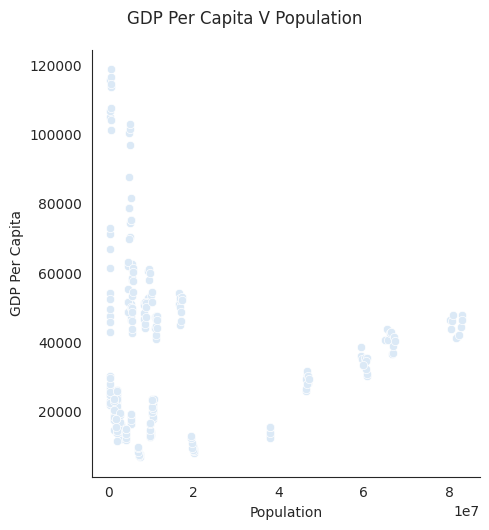

In [124]:
# Seaborn scatter plot to show GDP Per Capita V Population
sns.set_style('white')
g = sns.relplot(x="Population", y='GDP Per Capita', data=Eur_final_data, kind='scatter')
g.fig.suptitle('GDP Per Capita V Population', y=1.05)
g.set(xlabel="Population", ylabel="GDP Per Capita")
plt.show()

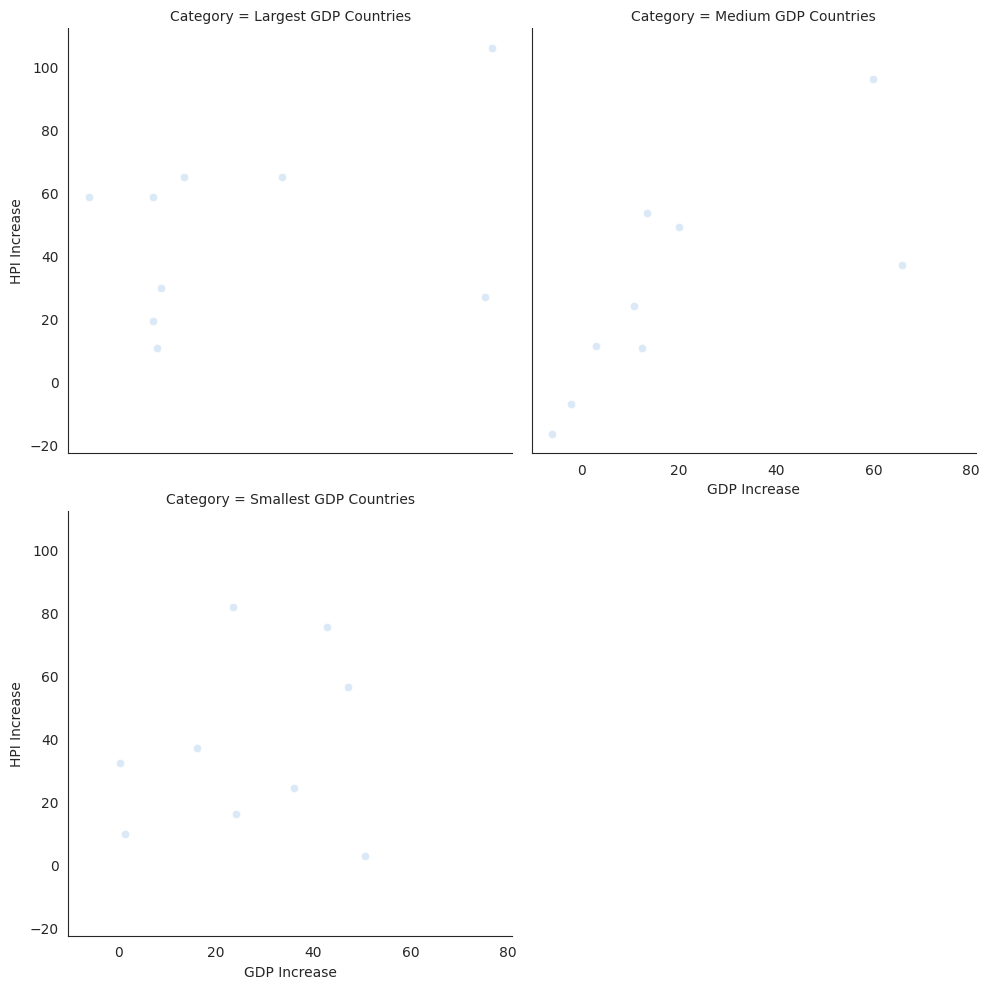

In [125]:
# Not in the report but used to show the col_order attribute
sns.set_style('white')
sns.relplot(x="GDP Increase", y='HPI Increase', data=Eur_final_data, kind='scatter', col='Category', col_wrap=2, col_order=['Largest GDP Countries', 'Medium GDP Countries', 'Smallest GDP Countries'])
plt.show()

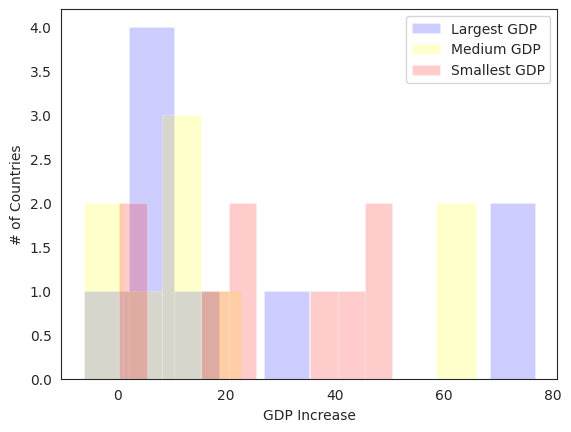

In [126]:
# Not in the report but used to show historgram plot along with controlling color and transparencies
sns.set_style('white')
Largest_GDP=pd.DataFrame(Eur_final_data)
Largest_GDP=Largest_GDP[np.logical_and(Largest_GDP['Year']==2019, Largest_GDP['Category']=='Largest GDP Countries')]
Medium_GDP=pd.DataFrame(Eur_final_data)
Medium_GDP=Medium_GDP[np.logical_and(Medium_GDP['Year']==2019, Medium_GDP['Category']=='Medium GDP Countries')]
Smallest_GDP=pd.DataFrame(Eur_final_data)
Smallest_GDP=Smallest_GDP[np.logical_and(Smallest_GDP['Year']==2019, Smallest_GDP['Category']=='Smallest GDP Countries')]
fig, ax=plt.subplots()
ax.hist(Largest_GDP['GDP Increase'], label='Largest GDP', color='blue', alpha=0.2)
ax.hist(Medium_GDP['GDP Increase'], label='Medium GDP', color='yellow', alpha=0.2)
ax.hist(Smallest_GDP['GDP Increase'], label='Smallest GDP', color='r', alpha=0.2)
ax.set_xlabel('GDP Increase')
ax.set_ylabel('# of Countries')
ax.legend()
plt.show()